<a href="https://colab.research.google.com/github/adeshshah2912/DS_Python/blob/main/Assignment_5_Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [37]:
#Read the data
df = pd.read_csv("/content/50_Startups.csv")
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [39]:
#check for missing values
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [40]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


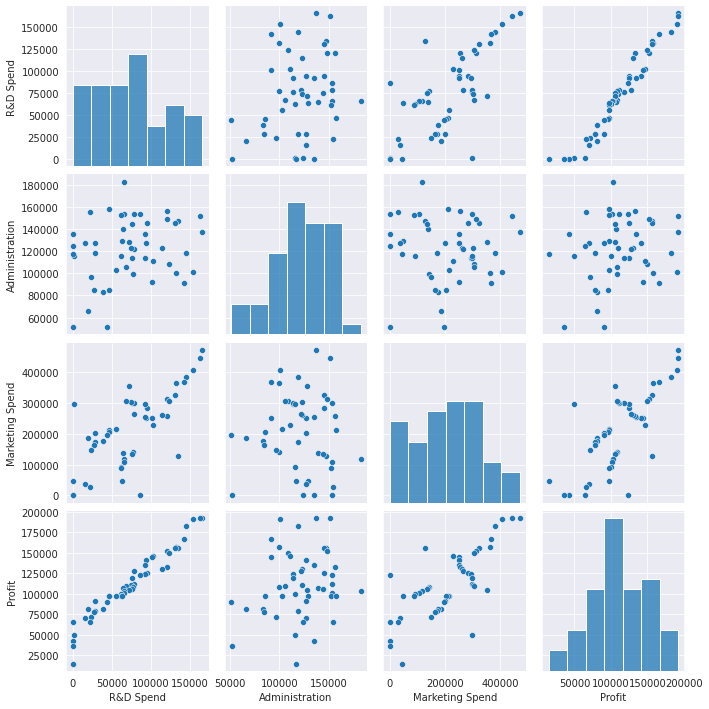

In [41]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

In [42]:
df=df.rename({'R&D Spend' : 'RDSpend' , 'Marketing Spend':'Marketing_Spend'},axis=1)
df

,RDSpend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [43]:
df[df.duplicated()]

,RDSpend,Administration,Marketing_Spend,State,Profit


# **Preparing a model**

In [44]:
#Build model
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RDSpend + Administration + Marketing_Spend',data=df).fit()

In [45]:
#Coefficients
model.params

Intercept          50122.192990
RDSpend                0.805715
Administration        -0.026816
Marketing_Spend        0.027228
dtype: float64

In [47]:
#t and p-Values
model.tvalues , np.round(model.pvalues,5)

(Intercept           7.626218
 RDSpend            17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64, Intercept          0.00000
 RDSpend            0.00000
 Administration     0.60176
 Marketing_Spend    0.10472
 dtype: float64)

In [48]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

**Simple Linear Regression Models**

In [49]:
s_a=smf.ols("Profit~Administration",data=df).fit()
s_a.tvalues , s_a.pvalues

(Intercept         3.040044
 Administration    1.419493
 dtype: float64, Intercept         0.003824
 Administration    0.162217
 dtype: float64)

In [50]:
s_m=smf.ols("Profit~Marketing_Spend",data=df).fit()
s_m.tvalues , s_m.pvalues

(Intercept          7.808356
 Marketing_Spend    7.802657
 dtype: float64, Intercept          4.294735e-10
 Marketing_Spend    4.381073e-10
 dtype: float64)

In [51]:
s_am=smf.ols("Profit~Administration + Marketing_Spend",data=df).fit()
s_am.tvalues , s_am.pvalues

(Intercept          1.142741
 Administration     2.467779
 Marketing_Spend    8.281039
 dtype: float64, Intercept          2.589341e-01
 Administration     1.729198e-02
 Marketing_Spend    9.727245e-11
 dtype: float64)

**Calculating VIF**

In [54]:
rsq_r=smf.ols("RDSpend~Administration+Marketing_Spend",data=df).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("Administration~RDSpend+Marketing_Spend",data=df).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("Marketing_Spend~RDSpend+Administration",data=df).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDSpend','Administration','Marketing_Spend'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDSpend,2.468903
1,Administration,1.175091
2,Marketing_Spend,2.326773


Since none of the above variable has vif>20 , therefore all variables will be considered for regression equation

**Residual Analysis**

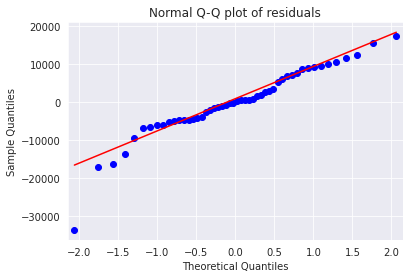

In [55]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [56]:
list(np.where(model.resid<-30000))

[array([49])]

In [57]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

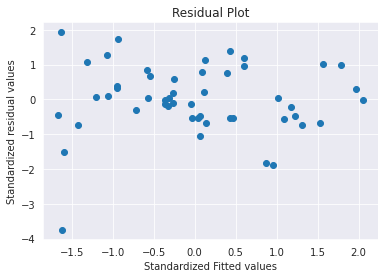

In [58]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

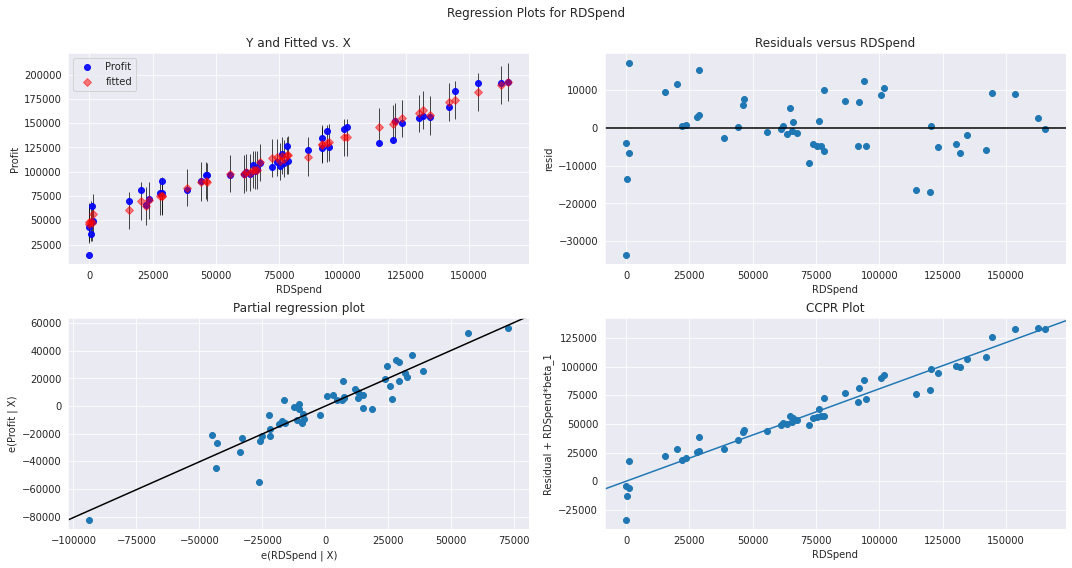

In [59]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDSpend", fig=fig)
plt.show()

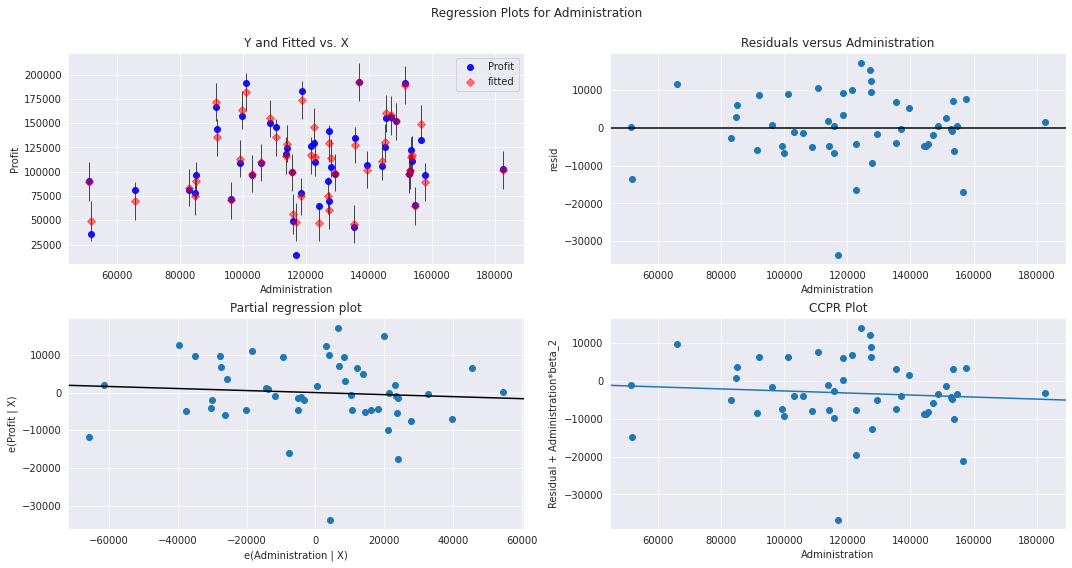

In [60]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

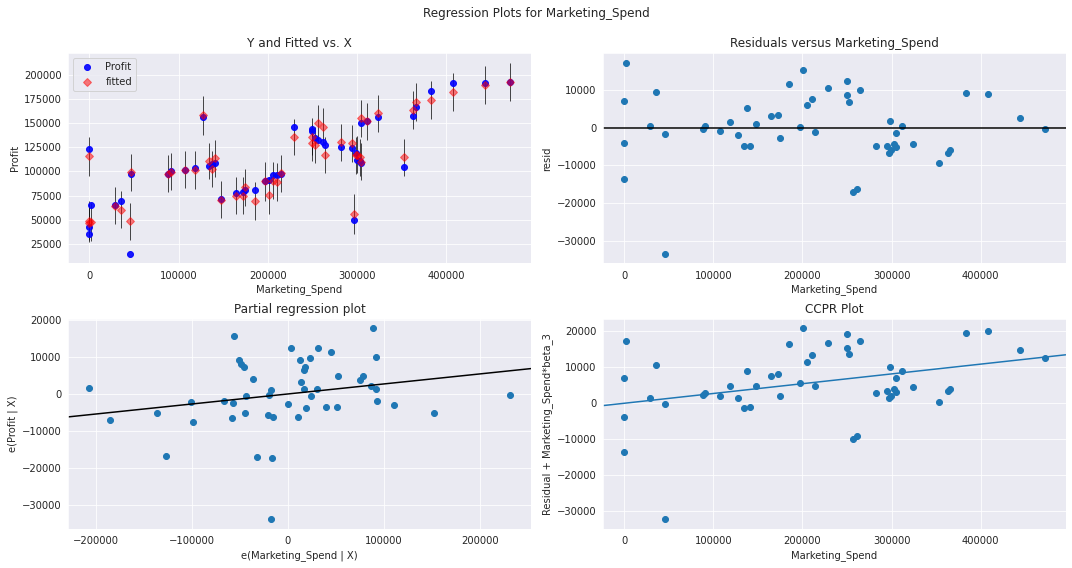

In [61]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Marketing_Spend", fig=fig)
plt.show()

**Model Deletion Diagnostics**


Detecting Influencers/Outliers

**Cook’s Distance**

In [62]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


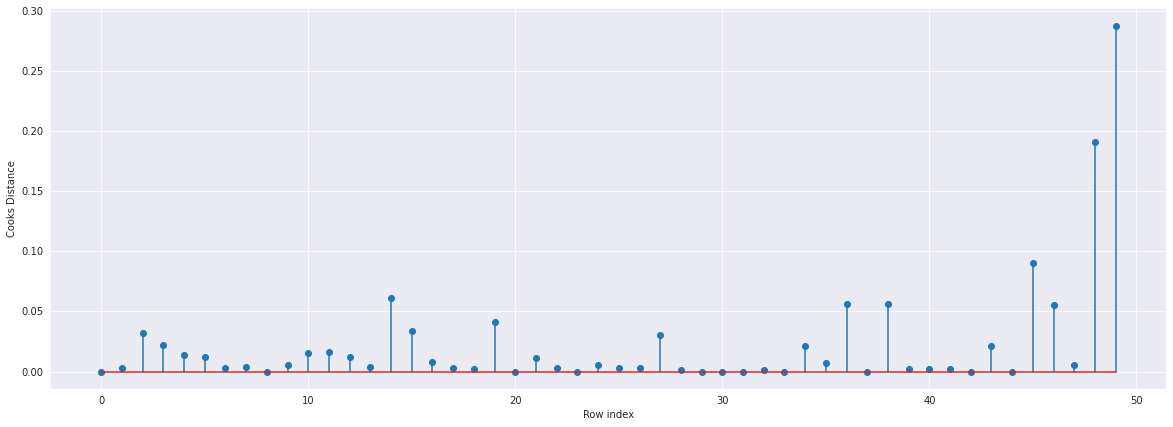

In [63]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [64]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

**High Influence points**

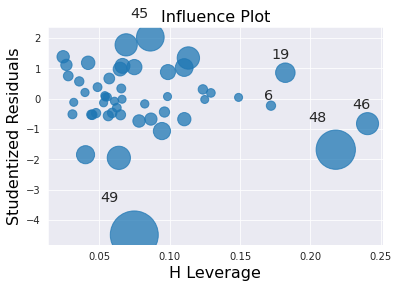

In [65]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [66]:
k = df.shape[1]
n = df.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.36

In [67]:
df[df.index.isin([49])]

,RDSpend,Administration,Marketing_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


**Improving the model**

In [68]:
df1=df.drop(df.index[[49]],axis=0).reset_index(drop=True)
df1

,RDSpend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [70]:
final_model=smf.ols("Profit~RDSpend+Administration+Marketing_Spend",data=df1).fit()
final_model.rsquared 

0.9613162435129847

Model Predictions


In [73]:
nd1=pd.DataFrame({'RDSpend':10000,"Administration":30000,"Marketing_Spend":10000},index=[0])
nd1

,RDSpend,Administration,Marketing_Spend
0,10000,30000,10000


In [74]:
final_model.predict(nd1)

0    59798.753232
dtype: float64

In [77]:
d={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
t=pd.DataFrame(d)
t

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
